# **Class 4: Deep Learning Introduction**

In [1]:
from IPython.display import Image, display
project_path = '/Users/tmsantos/Documents/CapstoneProject/CapstoneProject/'

# Part 1: Regression Problem with Single Layer Perceptron

## Delta Rule: Derivative of Mean Squared Error (MSE) and Weight Update

### Mean Squared Error (MSE) Loss Function

The Mean Squared Error (MSE) is defined as:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$ is the number of data points.
- $ y_i $ is the actual target value.
- $ \hat{y}_i $ is the predicted value of the model.

The objective is to minimize the MSE, so we need to find the gradient of the MSE with respect to the weight $ w $.

### Derivative of MSE with Respect to Weight $ w $

The predicted value $ \hat{y}_i $ is given by a linear equation:

$$
\hat{y}_i = w \cdot x_i + b
$$

Substitute $ \hat{y}_i $ into the MSE formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2
$$

Now, let's differentiate the MSE with respect to $ w $:


$$
\frac{\partial \text{MSE}}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial}{\partial w} \left[ (y_i - (w \cdot x_i + b))^2 \right]
$$

Using the chain rule, the derivative becomes:

$$
\frac{\partial \text{MSE}}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - \hat{y}_i) \cdot (-x_i)
$$

Simplifying:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


### Derivative of MSE with Respect to Bias $ b $

The predicted value $ \hat{y}_i $ is given by a linear equation:

$$
\hat{y}_i = w \cdot x_i + b
$$

Substitute $ \hat{y}_i $ into the MSE formula:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w \cdot x_i + b))^2
$$

Now, let's differentiate the MSE with respect to $ b $:

$$
\frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \frac{\partial}{\partial b} \left[ (y_i - (w \cdot x_i + b))^2 \right]
$$

Using the chain rule, the derivative becomes:

$$
\frac{\partial \text{MSE}}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2(y_i - \hat{y}_i) \cdot (-1)
$$

Simplifying:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

### Gradient Descent Update Rule for Weight $w$

In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{MSE}}{\partial w}
$$

Substitute the derivative of MSE with respect to \( w \):

$$
w = w - \eta \cdot \left(-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
$$

This simplifies to:

$$
w = w + \eta \cdot \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


For the **Delta Rule**, we typically consider updating weights for **each individual training example** rather than averaging over the entire dataset. This means we can drop the $ \frac{2}{n} $ factor and use only the term $ (y_i - \hat{y}_i) \cdot x_i $ to update the weight incrementally:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

### Gradient Descent Update Rule for Bias $b$

In gradient descent, the bias $ b $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
b = b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Substitute the derivative of MSE with respect to $ b $:

$$
b = b - \eta \cdot \left(-\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
$$

This simplifies to:

$$
b = b + \eta \cdot \frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

For the **Delta Rule**, we typically consider updating bias for **each individual training example** rather than averaging over the entire dataset. This means we can drop the $ \frac{2}{n} $ factor and use only the term $ (y_i - \hat{y}_i) $ to update the bias incrementally:

$$
b = b + \eta \cdot (y_i - \hat{y}_i)
$$

### Why Drop the $ \frac{2}{n} $ Factor?

In the Delta Rule, the weight update is performed **per training example** instead of for the entire batch. The $ \frac{2}{n} $ factor is only necessary when considering the average over the entire dataset (batch gradient descent). For incremental updates (also known as **stochastic gradient descent**), the weight update is directly proportional to the error without needing to average over all samples.

### Final Weight Update Rule

The weight update rule for each individual training example becomes:

$$
w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
$$

This is the Delta Rule used in the regression example, where:

- $ y_i - \hat{y}_i $ is the error.
- $ \eta $ is the learning rate.
- $ x_i $ is the input feature.

### Final Bias Update Rule

The bias update rule for each individual training example becomes:

$$
b = b + \eta \cdot (y_i - \hat{y}_i)
$$

This is the Delta Rule used in the regression example, where:

- $ y_i - \hat{y}_i $ is the error.
- $  \eta $  is the learning rate.


### Solving Regression Problem using Delta Rule (Stocastic Gradient Descent)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We will generate training data with one feature.

In [3]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2
input_size = 1

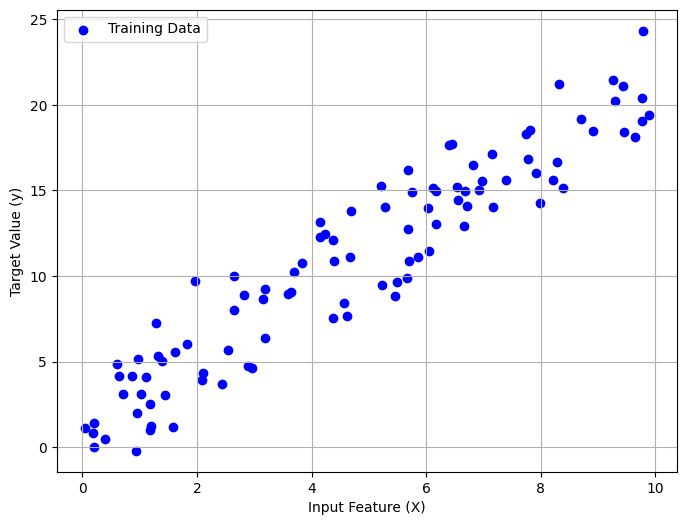

In [4]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Value (y)')
plt.legend()
plt.grid(True)
plt.show()

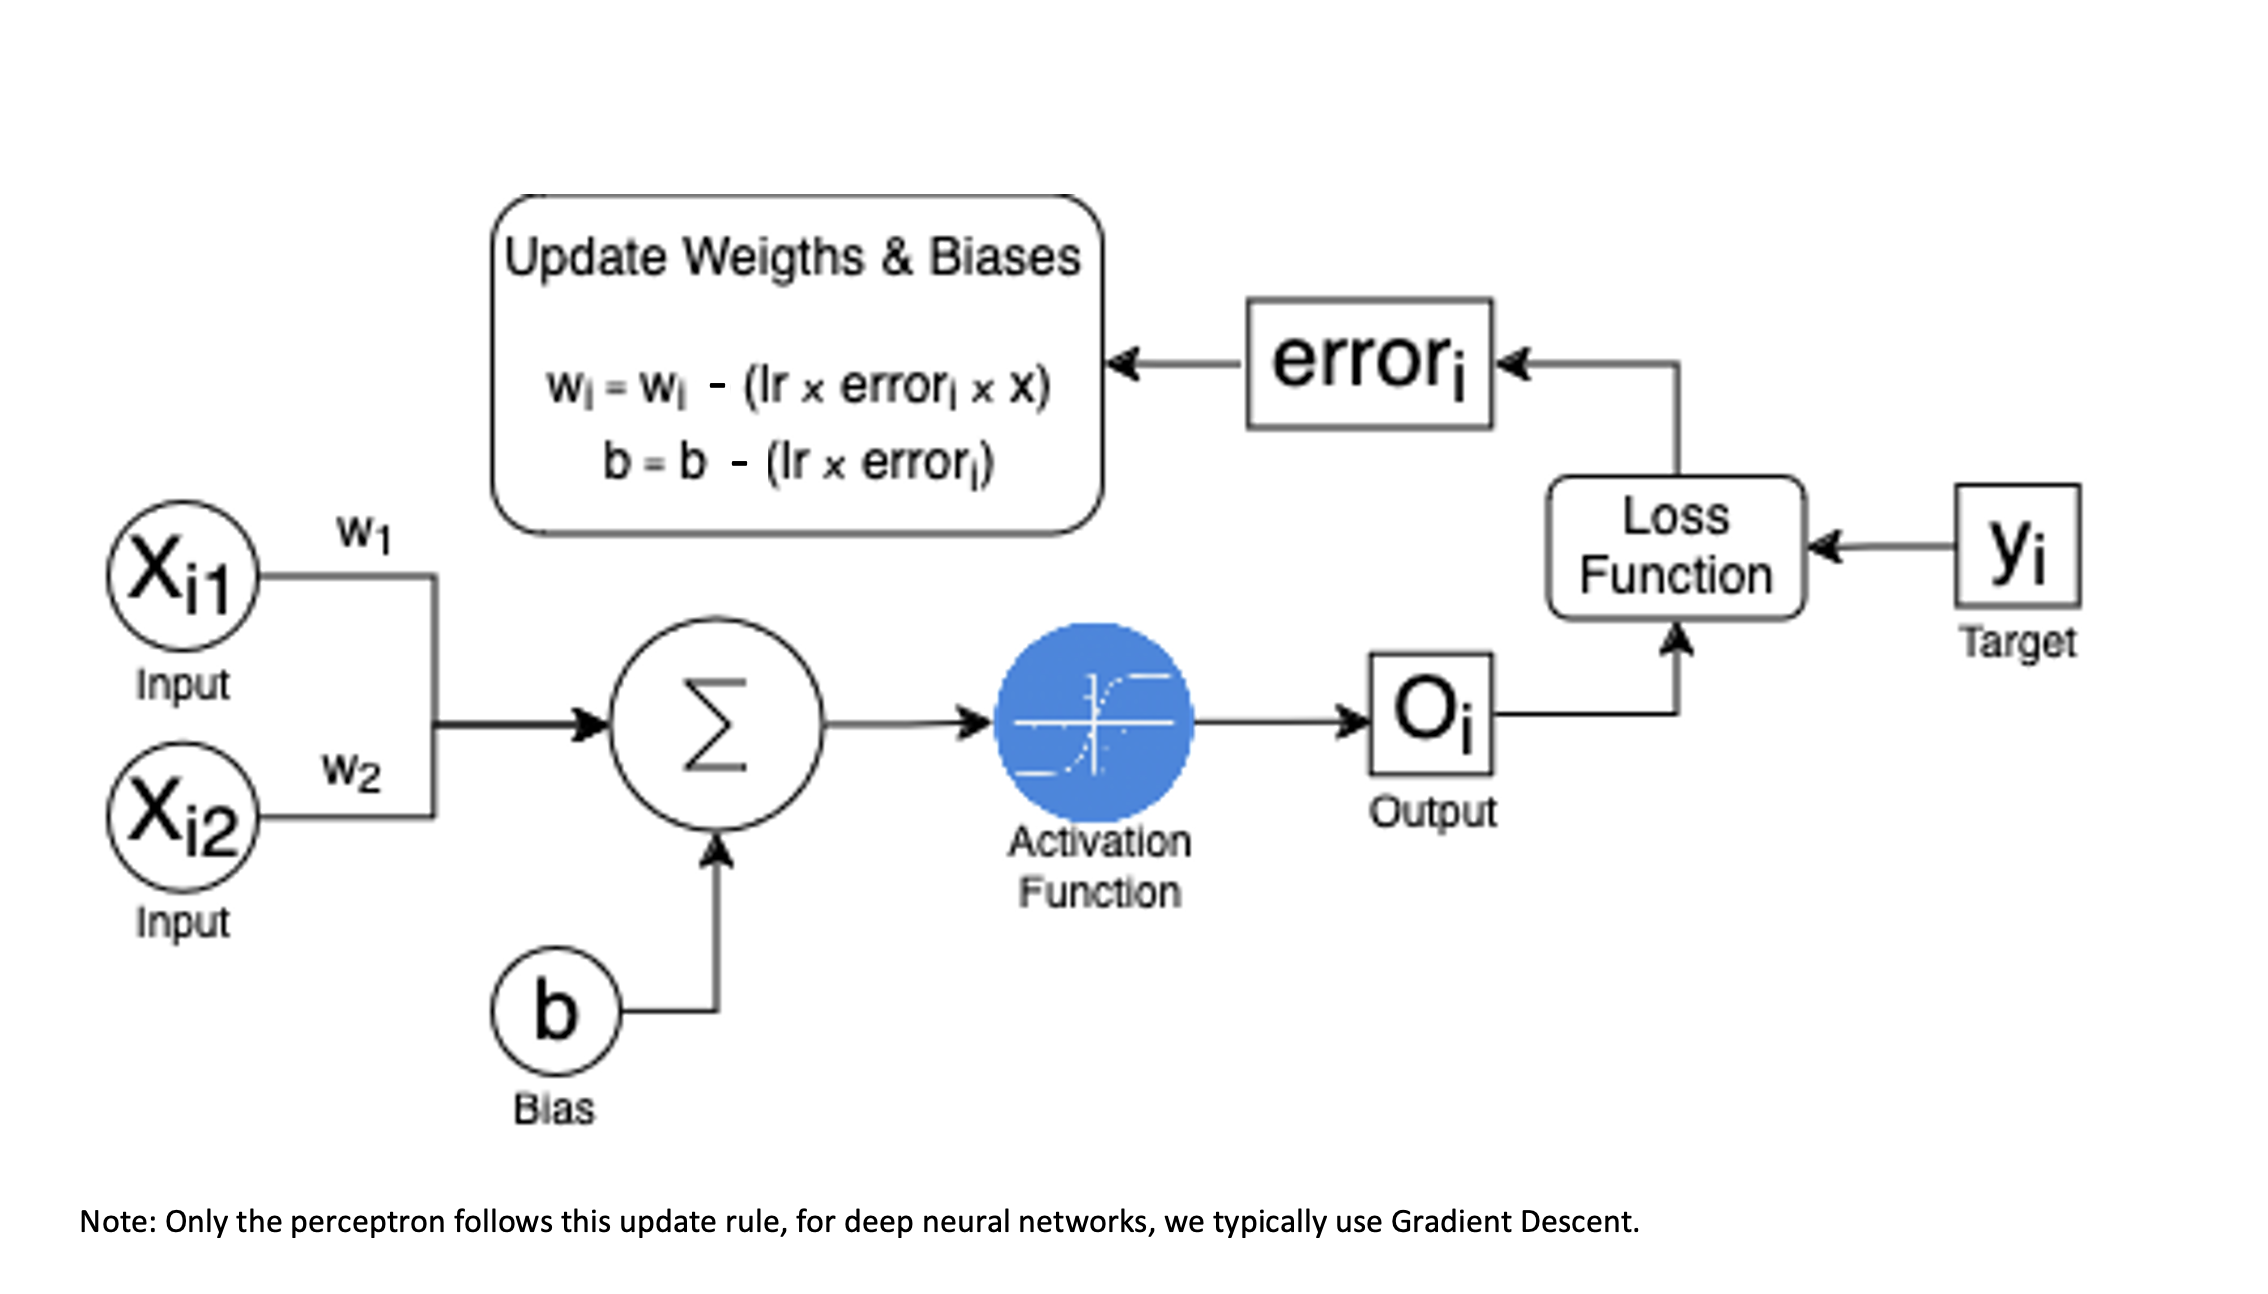

In [5]:
display(Image(filename=project_path+'images/class4/delta_rule.png', width=1000, height=800))


### **Exercise 1: Implement Stochastic Gradient Descent for Linear Regression**
Given the input dataset `X` and target values `y`:
1. Initialize the model's weights and bias randomly.
2. Implement a training loop using SGD to update weights and bias.
3. Monitor the Mean Squared Error (MSE) over epochs.
4. Output the final learned weights and bias.

1. **Initialize Parameters:**

In [6]:
weights = np.random.randn(input_size)
bias = np.random.randn()

**2. Training Loop:**

In [7]:
# Define learning rate, number of epochs
learning_rate = 0.01
epochs = 1000

# Stochastic Gradient Descent (SGD) training loop using Delta Rule
for epoch in range(epochs):
    # Loop through each sample (SGD)
    for i in range(X.shape[0]):
        # Get a single sample
        x_i = X[i]
        y_i = y[i]
        
        # Forward pass: compute prediction for the sample
        y_pred = x_i * weights + bias

        # Calculate the error
        error = y_i - y_pred

        # Update weights and bias using Delta Rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

3. **Calculate and Store Loss:**

In [8]:
# Define learning rate, number of epochs
learning_rate = 0.01
epochs = 1000

# Store loss values for plotting
loss_values = []

# Stochastic Gradient Descent (SGD) training loop using Delta Rule
for epoch in range(epochs):
    # Loop through each sample (SGD)
    for i in range(X.shape[0]):
        # Get a single sample
        x_i = X[i]
        y_i = y[i]
        
        # Forward pass: compute prediction for the sample
        y_pred = x_i * weights + bias

        # Calculate the error
        error = y_i - y_pred

        # Update weights and bias using Delta Rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error

    # Calculate the Mean Squared Error (MSE) for the epoch
    y_pred_all = np.dot(X, weights) + bias
    loss = np.mean((y - y_pred_all) ** 2)
    loss_values.append(loss)

4. **Output Final Model Parameters:**

In [9]:
# Print the final weights and bias
print(f"Final weights: {weights}, Final bias: {bias}")

Final weights: [1.7956223], Final bias: [1.60369039]


5. **Plot Loss Over Epochs:**

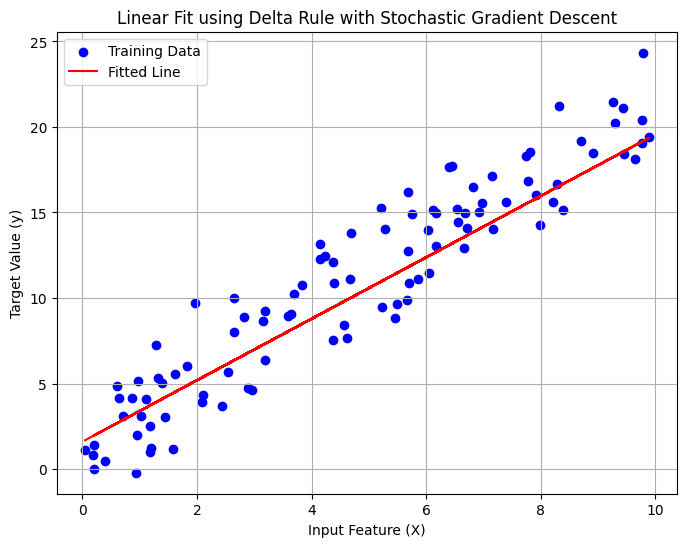

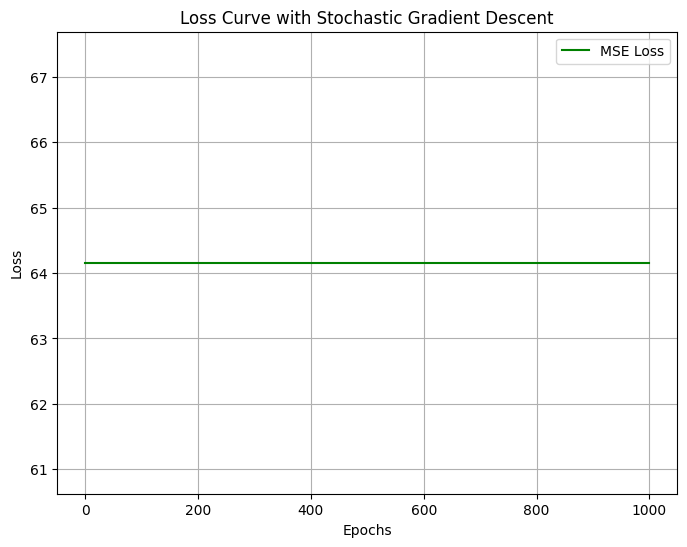

In [10]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, np.dot(X, weights) + bias, color='red', label='Fitted Line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Value (y)')
plt.title('Linear Fit using Delta Rule with Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(loss_values, color='green', label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve with Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 2: Implementing a Base Perceptron Class

Create a class called `Perceptron` base class to implement a linear regression model using gradient descent.

1. **Attributes:**
   - `learning_rate`: Controls the step size during parameter updates.
   - `epochs`: The number of iterations through the dataset.
   - `weights` & `bias`: Model parameters to be learned.
   - `loss_values`: List to store loss values during training.

2. **Methods:**
   - `initialize_parameters(input_size)`: Initializes weights and bias based on the size of the input features.

In [11]:
# Base class for Perceptron
class Perceptron:
    def __init__(self, learning_rate=1e-5, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_values = []

    def initialize_parameters(self, input_size):
        # Initialize weights for each input feature and a single bias value
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()

### Exercise 3: Implementing a Regressor Perceptron Class a subclass of Perceptron

Create a class called `RegressorPerceptron` base class to implement a linear regression model using gradient descent.

1. **Methods:**
   - `predict(X)`: Calculates predictions using the current weights and bias.

In [12]:
# Base class for Perceptron
class RegressorPerceptron(Perceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):
        super().__init__(learning_rate, epochs)
    
    def predict(self, X):
        # Predict output for the given input data
        X = np.array(X)
        return np.dot(X, self.weights) + self.bias

### Exercise 4: Implementing the `RegressorPerceptronSGD` class a subclass of `RegressorPerceptron`

1. **New Attributes:**
   - `shuffle`: A boolean indicating whether to shuffle the data before each epoch.

2. **New Methods:**
   - `train(X, y)`: Implements the SGD training loop with shuffling.
   - `plot_loss()`: Plots the loss over epochs.
   - `plot_epoch_info_loss()`: Plots the loss distribution for each sample within each epoch.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot (y_i - \hat{y}_i) \cdot x_i
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot (y_i - \hat{y}_i)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.

### **Tasks:**
1. **Complete the `train` method by implementing the following functionalities:**
   - Shuffle the dataset at the beginning of each epoch if `self.shuffle` is set to `True`.
   - Update weights and bias using the Delta Rule.
   - Track and store the MSE loss at the end of each epoch.
   - Track and store the MSE loss for each sample and at end of an epoch calculate the mean and standard deviation.


2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.
   - Define `plot_epoch_info_loss()` to plot the mean and standard deviation of the loss for each sample within each epoch.


In [13]:
# Subclass for Stochastic Gradient Descent
class RegressorPerceptronSGD(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100, shuffle=True):
        super().__init__(learning_rate, epochs)
        self.shuffle = shuffle

    def train(self, X, y):
        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # Initialize parameters based on the number of features in the input
        self.initialize_parameters(X.shape[1])

        self.epoch_info_loss = {}

        for epoch in range(self.epochs):
            if self.shuffle:
                # Shuffle the data
                indices = np.arange(X.shape[0])
                np.random.shuffle(indices)
                X = X[indices]
                y = y[indices]

            self.epoch_info_loss[epoch] = {}

            epoch_losses = []

            for i in range(X.shape[0]):  # Loop through each sample
                x_i = X[i]
                y_i = y[i]

                # Compute the linear combination of weights and inputs + bias
                y_pred = np.dot(x_i, self.weights) + self.bias

                # Calculate the error
                error = y_i - y_pred

                # Update weights and bias using the Delta Rule
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

                # Calculate Mean Squared Error (MSE) for the current sample
                sample_loss = error ** 2

                # Store the loss for the current sample
                epoch_losses.append(sample_loss)

            # Calculate the average and standard deviation of the loss for the current epoch
            self.epoch_info_loss[epoch]['mean'] = np.mean(epoch_losses)
            self.epoch_info_loss[epoch]['std'] = np.std(epoch_losses)

            # Calculate Mean Squared Error (MSE) for the entire training set
            y_pred_all = np.dot(X, self.weights) + self.bias
            loss = np.mean((y - y_pred_all) ** 2)
            self.loss_values.append(loss)


    def plot_loss(self):
        # Create a plot for the batch loss with epochs as the x-axis
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_values, label='Loss', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss per Epoch')
        plt.legend()
        plt.grid()
        plt.show()
    
    def plot_epoch_info_loss(self):
        # Create a plot for the loss of each sample in each epoch
        plt.figure(figsize=(10, 5))
        for epoch in self.epoch_info_loss:
            mean = self.epoch_info_loss[epoch]['mean']
            std = self.epoch_info_loss[epoch]['std']
            plt.errorbar(epoch, mean, yerr=std, fmt='o', color='red')
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss per Sample in each Epoch')
        plt.grid()
        plt.show()

In [14]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [15]:
model = RegressorPerceptronSGD()

In [16]:
# Train the model using the generated data
model.train(X, y)

Final weights: [2.23302469], Final bias: [-0.90846534]


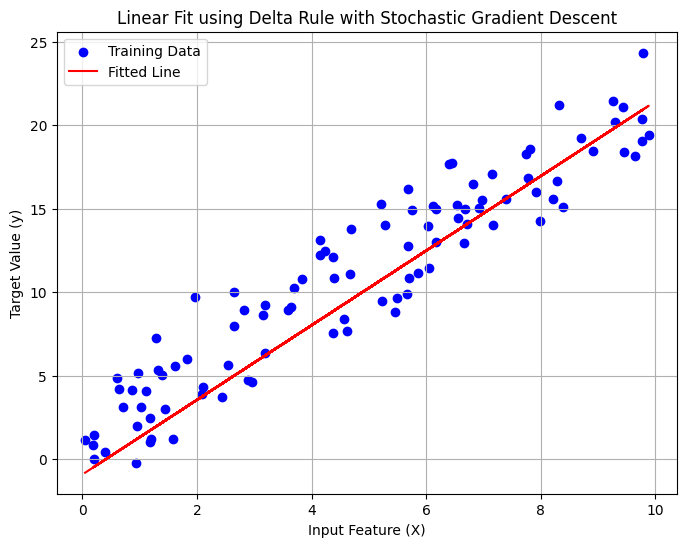

In [17]:
# Print final weights and bias
print(f"Final weights: {model.weights}, Final bias: {model.bias}")

# Make predictions and plot the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Value (y)')
plt.title('Linear Fit using Delta Rule with Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

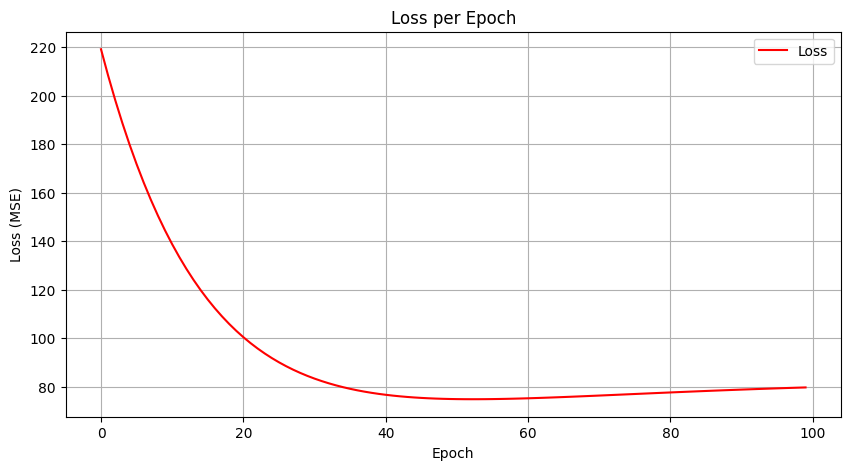

In [18]:
model.plot_loss()

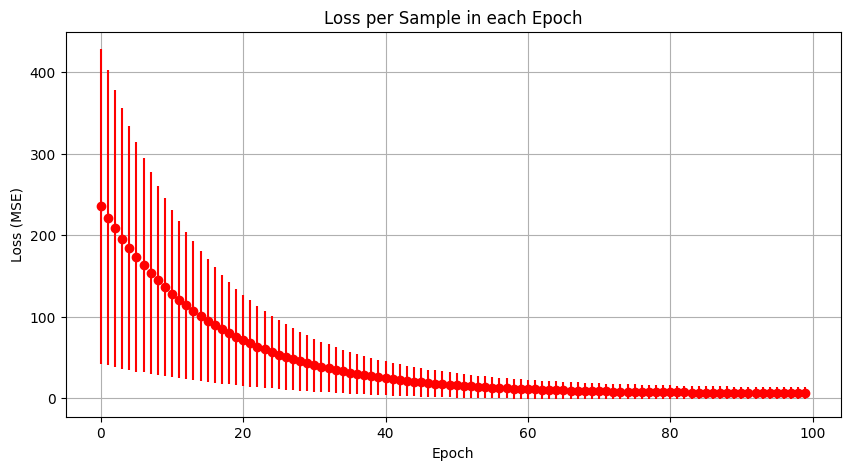

In [19]:
model.plot_epoch_info_loss()

In [20]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

In [21]:
## Testar learning rate e epochs

In [22]:
# Create an instance of the PerceptronSGD class
model = RegressorPerceptronSGD(epochs=10000)

# Train the model using the generated data
model.train(X, y)

Final weights: [3.07255067], Final bias: [6.87256208]


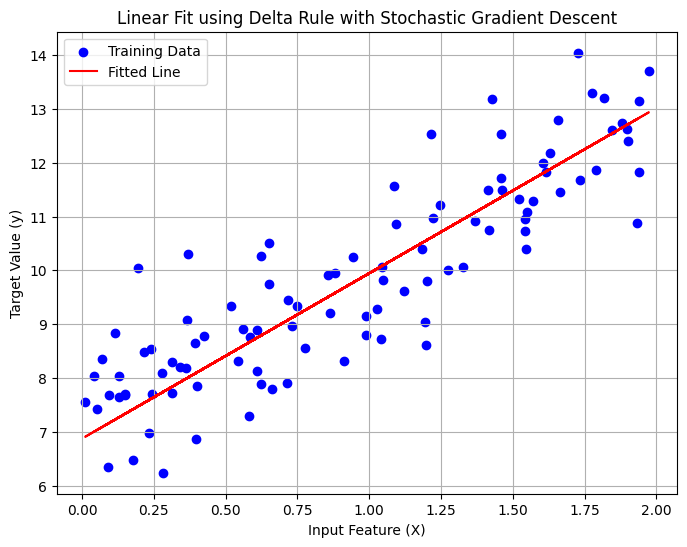

In [23]:
# Print final weights and bias
print(f"Final weights: {model.weights}, Final bias: {model.bias}")

# Make predictions and plot the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('Input Feature (X)')
plt.ylabel('Target Value (y)')
plt.title('Linear Fit using Delta Rule with Stochastic Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

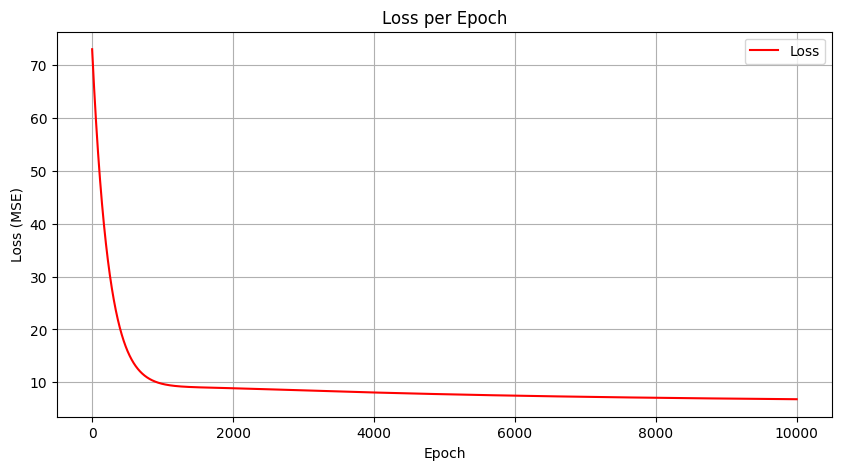

In [24]:
model.plot_loss()

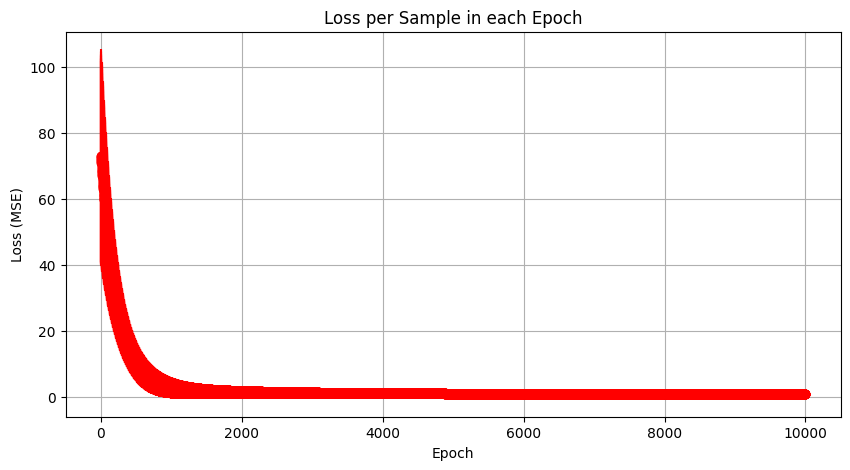

In [25]:
model.plot_epoch_info_loss()

# Part 2: Types of Gradient Descent

### For Batch Gradient Descent (BGD) and Mini-Batch Gradient Descent (MBGD) we don't exluce $ \frac{2}{n} $

### Gradient Descent Update Rule for Weight $w$

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i
$$


In gradient descent, the weight $ w $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
w = w - \eta \cdot \frac{\partial \text{MSE}}{\partial w}
$$

Substitute the derivative of MSE with respect to $ w $:

$$
w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
$$


### Gradient Descent Update Rule for Bias $b$

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

In gradient descent, the bias $ b $ is updated by subtracting a small fraction (controlled by the learning rate $ \eta $) of the gradient:

$$
b = b - \eta \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Substitute the derivative of MSE with respect to $ b $:

$$
b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
$$

## Batch Gradient Descent

### Exercise 5: Implementing the `RegressorPerceptronSGD` class a subclass of `RegressorPerceptron`

Implementing Batch Gradient Descent (BGD) for Linear Regression

1. **New Methods:**
   - `train(X, y)`: Implements the SGD training loop with shuffling.
   - `plot_loss()`: Plots the loss over epochs.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
   - $n$ is the number of data points.

2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.
   - $n$ is the number of data points.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.
   - $ n $ number of samples in dataset.

### **Tasks:**
1. **Complete the `train` method by implementing the following functionalities:**
   - Update weights and bias using the Delta Rule.
   - Track and store the MSE loss at the end of each epoch.

2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.

In [26]:
# Subclass for Batch Gradient Descent
class RegressorPerceptronBGD(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100):
        super().__init__(learning_rate, epochs)

    def train(self, X, y):
        """Train the model using Batch Gradient Descent."""
        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # Initialize parameters based on the number of features in the input
        self.initialize_parameters(X.shape[1])

        for epoch in range(self.epochs):
            # Predict for the entire dataset
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate error
            error = y - y_pred

            # Multiple each error position by the corresponding input feature
            inside_sum = np.dot(X.T, error)
            
            # Calculate the weigth update for the entire batch
            weight_update = self.learning_rate * inside_sum.sum(axis=1) * 2 / len(X)
  
            # Update weights and bias using the batch gradient
            self.weights += weight_update
            self.bias += self.learning_rate * np.mean(error)

            # Calculate Mean Squared Error (MSE) for the entire training set
            y_pred_all = np.dot(X, self.weights) + self.bias
            loss = np.mean((y - y_pred_all) ** 2)
            self.loss_values.append(loss)

            # Print loss every epoch for monitoring
            if (epoch + 1) % 1 == 0:  # Adjust printing frequency if needed
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss:.4f}')

    def plot_loss(self):
        # Plot the loss over epochs
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_values, color='green', label=' Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss per Epoch')
        plt.legend()
        plt.grid()
        plt.show()

In [27]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [28]:
model1 = RegressorPerceptronBGD()
model1.train(X, y)

Epoch [1/100], Loss: 209.0191
Epoch [2/100], Loss: 189.8088
Epoch [3/100], Loss: 172.8700
Epoch [4/100], Loss: 157.9778
Epoch [5/100], Loss: 144.9279
Epoch [6/100], Loss: 133.5351
Epoch [7/100], Loss: 123.6314
Epoch [8/100], Loss: 115.0646
Epoch [9/100], Loss: 107.6967
Epoch [10/100], Loss: 101.4028
Epoch [11/100], Loss: 96.0698
Epoch [12/100], Loss: 91.5953
Epoch [13/100], Loss: 87.8867
Epoch [14/100], Loss: 84.8602
Epoch [15/100], Loss: 82.4403
Epoch [16/100], Loss: 80.5586
Epoch [17/100], Loss: 79.1535
Epoch [18/100], Loss: 78.1693
Epoch [19/100], Loss: 77.5559
Epoch [20/100], Loss: 77.2681
Epoch [21/100], Loss: 77.2654
Epoch [22/100], Loss: 77.5111
Epoch [23/100], Loss: 77.9725
Epoch [24/100], Loss: 78.6201
Epoch [25/100], Loss: 79.4275
Epoch [26/100], Loss: 80.3710
Epoch [27/100], Loss: 81.4295
Epoch [28/100], Loss: 82.5842
Epoch [29/100], Loss: 83.8181
Epoch [30/100], Loss: 85.1163
Epoch [31/100], Loss: 86.4654
Epoch [32/100], Loss: 87.8537
Epoch [33/100], Loss: 89.2708
Epoch [34

In [29]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

In [30]:
model2 = RegressorPerceptronBGD()
model2.train(X, y)

Epoch [1/100], Loss: 73.0111
Epoch [2/100], Loss: 72.7341
Epoch [3/100], Loss: 72.4584
Epoch [4/100], Loss: 72.1840
Epoch [5/100], Loss: 71.9108
Epoch [6/100], Loss: 71.6389
Epoch [7/100], Loss: 71.3682
Epoch [8/100], Loss: 71.0987
Epoch [9/100], Loss: 70.8305
Epoch [10/100], Loss: 70.5635
Epoch [11/100], Loss: 70.2978
Epoch [12/100], Loss: 70.0332
Epoch [13/100], Loss: 69.7699
Epoch [14/100], Loss: 69.5078
Epoch [15/100], Loss: 69.2468
Epoch [16/100], Loss: 68.9871
Epoch [17/100], Loss: 68.7286
Epoch [18/100], Loss: 68.4713
Epoch [19/100], Loss: 68.2151
Epoch [20/100], Loss: 67.9602
Epoch [21/100], Loss: 67.7064
Epoch [22/100], Loss: 67.4537
Epoch [23/100], Loss: 67.2023
Epoch [24/100], Loss: 66.9520
Epoch [25/100], Loss: 66.7029
Epoch [26/100], Loss: 66.4549
Epoch [27/100], Loss: 66.2080
Epoch [28/100], Loss: 65.9624
Epoch [29/100], Loss: 65.7178
Epoch [30/100], Loss: 65.4744
Epoch [31/100], Loss: 65.2321
Epoch [32/100], Loss: 64.9909
Epoch [33/100], Loss: 64.7509
Epoch [34/100], Los

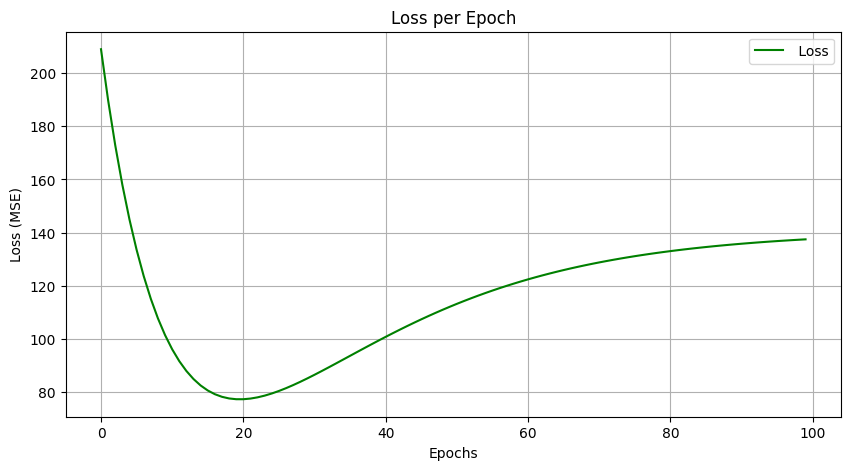

In [31]:
model1.plot_loss()

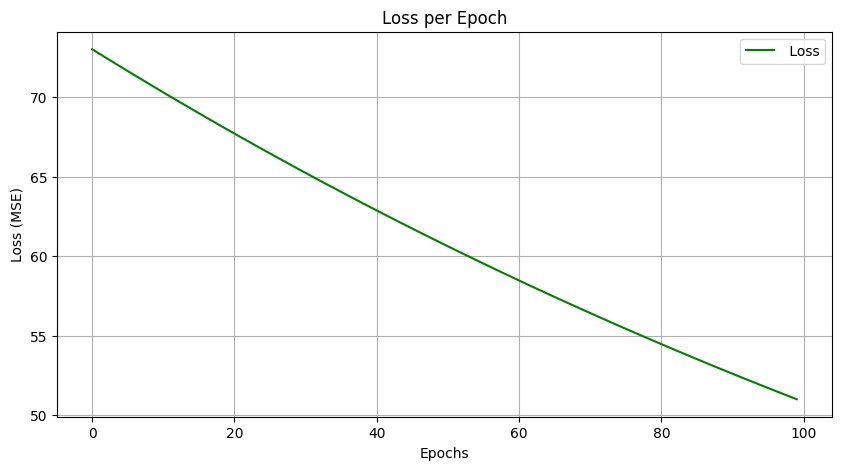

In [32]:
model2.plot_loss()  

## Mini-Batch Gradient Descent

### Exercise 6: Implementing the `RegressorPerceptronMBGD` class a subclass of `RegressorPerceptron`

Implementing Mini-Batch Gradient Descent (MBGD) for Linear Regression

1. **New Attributes:**
   - `batch_size`: The number of samples in each mini-batch. Default is 16.
   - `shuffle`: A boolean indicating whether to shuffle the data at the start of each epoch. Default is `True`.

2. **New Methods:**
   - `train(X, y)`: Implements the mini-batch gradient descent training loop.
   - `plot_loss()`: Plots the loss over epochs.
   - `plot_epoch_info_loss()`: Plots the loss distribution for each batch within each epoch.

#### **Mathematical Background:**
1. **Weight Update Formula:**
   $$
   w = w + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot x_i\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $ \eta $ is the learning rate.
   - $ x_i $ is the input feature.
   - $n$ is the number of data points.

2. **Bias Update Formula:**
   $$
   b = b + \eta \cdot \left(\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)\right)
   $$

   This is the Delta Rule used in the regression example, where:

   - $ y_i - \hat{y}_i $ is the error.
   - $  \eta $  is the learning rate.
   - $n$ is the number of data points.

3. **Loss Function:**
   $$
   \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
   $$

   Where:
   - $n$ is the number of data points.
   - $ y_i $ is the actual target value.
   - $ \hat{y}_i $ is the predicted value of the model.
   - $ n $ number of samples in dataset.


### **Task:**
1. Complete the `train` method by implementing the following functionalities:
   - Shuffle the dataset at the beginning of each epoch if `self.shuffle` is set to `True`.
   - Divide the dataset into mini-batches.
   - Update weights and bias using the gradients computed for each mini-batch.
   - Track and store the MSE loss at the end of each epoch.
   - Track and store the MSE loss for each sample and at end of an epoch calculate the mean and standard deviation.

2. **Implement Plotting Methods:**
   - Define `plot_loss()` to plot `self.loss_values` over epochs.
   - Define `plot_epoch_info_loss()` to plot the mean and standard deviation of the loss for each sample within each epoch.


In [33]:
# Subclass for Mini-Batch Gradient Descent with an optional Shuffling parameter
class RegressorPerceptronMBGB(RegressorPerceptron):
    def __init__(self, learning_rate=1e-5, epochs=100, batch_size=16, shuffle=True):
        super().__init__(learning_rate, epochs)
        self.batch_size = batch_size
        self.shuffle = shuffle  # New parameter to control shuffling

    def train(self, X, y):
        # Ensure X and y are numpy arrays
        X = np.array(X)
        y = np.array(y)

        # Initialize parameters based on the number of features in the input
        self.initialize_parameters(X.shape[1])

        self.epoch_info_loss = {}  # Store loss values for each epoch

        for epoch in range(self.epochs):
            # Shuffle the data at the beginning of each epoch if shuffle is set to True
            if self.shuffle:
                indices = np.arange(X.shape[0])
                np.random.shuffle(indices)
                X = X[indices]
                y = y[indices]

            self.epoch_info_loss[epoch] = {}
            epoch_losses = []

            # Loop through mini-batches
            for i in range(0, len(X), self.batch_size):
                X_batch = X[i:i + self.batch_size]
                y_batch = y[i:i + self.batch_size]

                # Compute the linear combination of weights and inputs + bias
                y_pred = np.dot(X_batch, self.weights) + self.bias

                # Calculate the error
                error = y_batch - y_pred

                # Multiple each error position by the corresponding input feature
                inside_sum = np.dot(X_batch.T, error)
                
                # Calculate the weight update for the entire batch
                weight_update = self.learning_rate * inside_sum.sum(axis=1) * 2 / len(X_batch)
    
                # Update weights and bias using the batch gradient
                self.weights += weight_update
                self.bias += self.learning_rate * np.mean(error)

                # Calculate Mean Squared Error (MSE) for the batch
                y_pred_batch = np.dot(X_batch, self.weights) + self.bias
                loss = np.mean((y_batch - y_pred_batch) ** 2)
                
                epoch_losses.append(loss)   

            # Calculate the average and standard deviation of the loss for the current epoch
            self.epoch_info_loss[epoch]['mean'] = np.mean(epoch_losses)
            self.epoch_info_loss[epoch]['std'] = np.std(epoch_losses)

            # Calculate Mean Squared Error (MSE) for the entire training set
            y_pred_all = np.dot(X, self.weights) + self.bias
            loss = np.mean((y - y_pred_all) ** 2)
            self.loss_values.append(loss)

            # Print loss every epoch for monitoring
            if (epoch + 1) % 1 == 0:  # Adjust printing frequency if needed
                print(f'Epoch [{epoch+1}/{self.epochs}], Loss: {loss:.4f}')


    def plot_loss(self):
        # Plot the loss over epochs
        plt.figure(figsize=(10, 5))
        plt.plot(self.loss_values, label=' Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss per Epoch')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_epoch_info_loss(self):
        # Create a plot for the loss of each sample in each epoch
        plt.figure(figsize=(10, 5))
        for epoch in self.epoch_info_loss:
            mean = self.epoch_info_loss[epoch]['mean']
            std = self.epoch_info_loss[epoch]['std']
            plt.errorbar(epoch, mean, yerr=std, fmt='o', color='blue')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss per Batch in each Epoch')
        plt.grid()
        plt.show()

In [34]:
# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1) * 10

# Linear function with some noise
y = 2 * X + 1 + np.random.randn(100, 1) * 2

In [35]:
model1 = RegressorPerceptronMBGB()
model1.train(X, y)

Epoch [1/100], Loss: 209.3655
Epoch [2/100], Loss: 190.4440
Epoch [3/100], Loss: 173.7176
Epoch [4/100], Loss: 158.9977
Epoch [5/100], Loss: 146.0416
Epoch [6/100], Loss: 134.7180
Epoch [7/100], Loss: 124.9289
Epoch [8/100], Loss: 116.3652
Epoch [9/100], Loss: 109.0117
Epoch [10/100], Loss: 102.6638
Epoch [11/100], Loss: 97.3161
Epoch [12/100], Loss: 92.7414
Epoch [13/100], Loss: 88.9292
Epoch [14/100], Loss: 85.7944
Epoch [15/100], Loss: 83.2512
Epoch [16/100], Loss: 81.2337
Epoch [17/100], Loss: 79.6930
Epoch [18/100], Loss: 78.5740
Epoch [19/100], Loss: 77.7866
Epoch [20/100], Loss: 77.3360
Epoch [21/100], Loss: 77.1695
Epoch [22/100], Loss: 77.2568
Epoch [23/100], Loss: 77.5582
Epoch [24/100], Loss: 78.0341
Epoch [25/100], Loss: 78.6505
Epoch [26/100], Loss: 79.4023
Epoch [27/100], Loss: 80.3240
Epoch [28/100], Loss: 81.2951
Epoch [29/100], Loss: 82.3040
Epoch [30/100], Loss: 83.4227
Epoch [31/100], Loss: 84.5596
Epoch [32/100], Loss: 85.7423
Epoch [33/100], Loss: 86.9464
Epoch [34

In [36]:
# Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, single feature
y = 3 * X + 7 + np.random.randn(100, 1)  # True relationship plus Gaussian noise

In [37]:
model2 = RegressorPerceptronMBGB()
model2.train(X, y)

Epoch [1/100], Loss: 73.0031
Epoch [2/100], Loss: 72.7182
Epoch [3/100], Loss: 72.4345
Epoch [4/100], Loss: 72.1522
Epoch [5/100], Loss: 71.8711
Epoch [6/100], Loss: 71.5914
Epoch [7/100], Loss: 71.3130
Epoch [8/100], Loss: 71.0358
Epoch [9/100], Loss: 70.7599
Epoch [10/100], Loss: 70.4854
Epoch [11/100], Loss: 70.2124
Epoch [12/100], Loss: 69.9405
Epoch [13/100], Loss: 69.6700
Epoch [14/100], Loss: 69.4007
Epoch [15/100], Loss: 69.1329
Epoch [16/100], Loss: 68.8663
Epoch [17/100], Loss: 68.6007
Epoch [18/100], Loss: 68.3364
Epoch [19/100], Loss: 68.0732
Epoch [20/100], Loss: 67.8114
Epoch [21/100], Loss: 67.5508
Epoch [22/100], Loss: 67.2914
Epoch [23/100], Loss: 67.0340
Epoch [24/100], Loss: 66.7771
Epoch [25/100], Loss: 66.5215
Epoch [26/100], Loss: 66.2672
Epoch [27/100], Loss: 66.0138
Epoch [28/100], Loss: 65.7620
Epoch [29/100], Loss: 65.5114
Epoch [30/100], Loss: 65.2621
Epoch [31/100], Loss: 65.0135
Epoch [32/100], Loss: 64.7664
Epoch [33/100], Loss: 64.5206
Epoch [34/100], Los

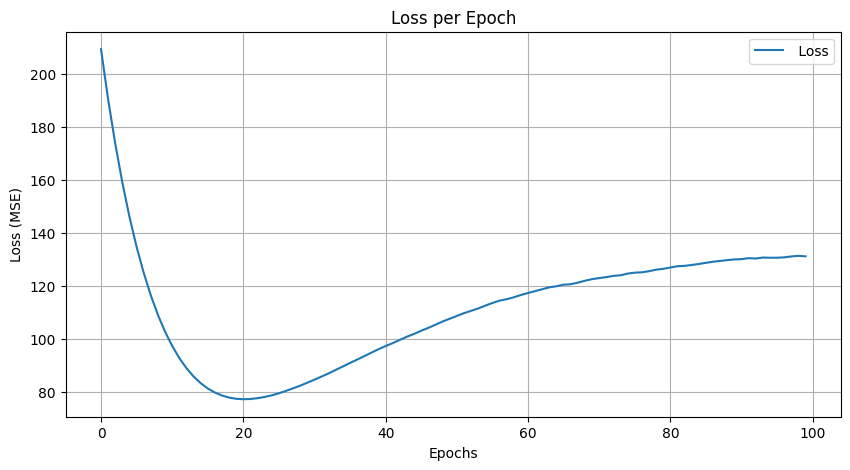

In [38]:
model1.plot_loss()

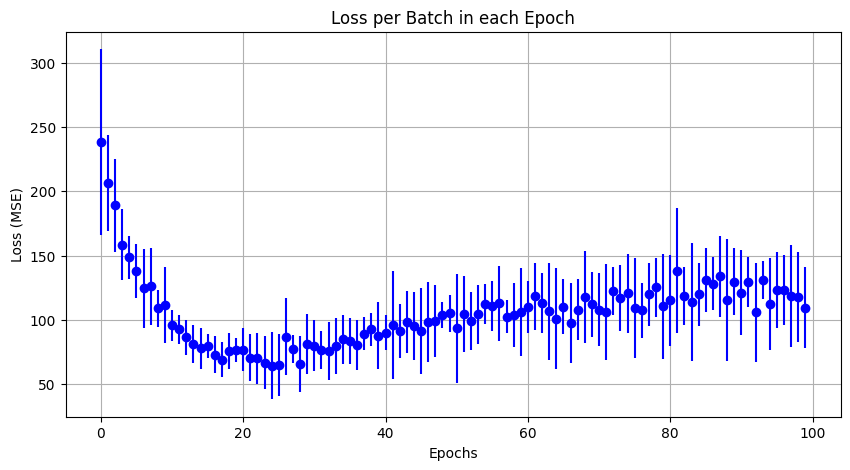

In [39]:
model1.plot_epoch_info_loss()

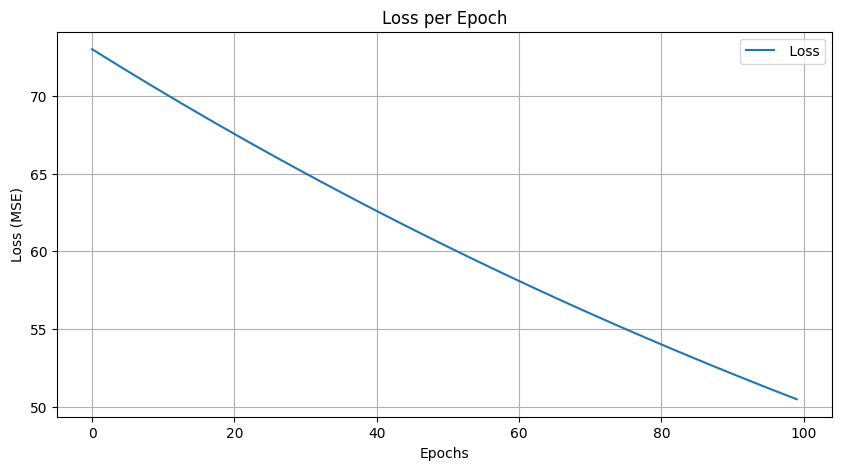

In [40]:
model2.plot_loss()  

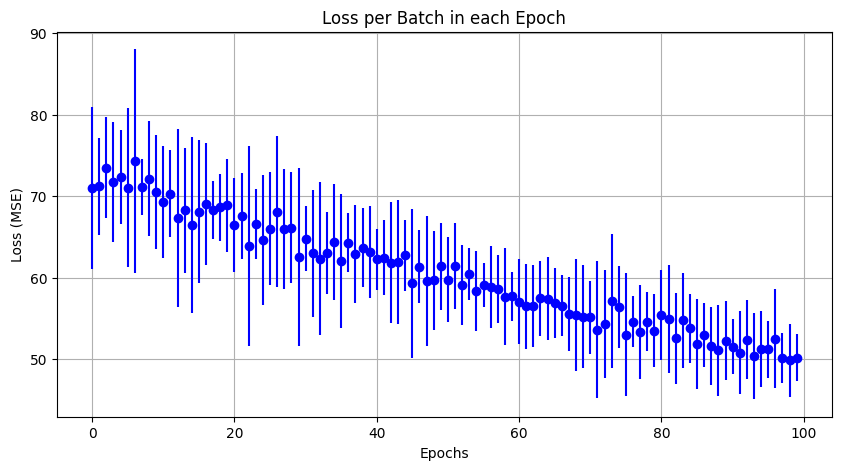

In [41]:
model2.plot_epoch_info_loss()